In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\user\Downloads\day.xlsx")  
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [3]:
# Tells the DataFrame object.
type(df)

pandas.core.frame.DataFrame

In [4]:
# number of rows and column
df.shape

(730, 16)

In [5]:
# columns in dataset..
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#statistical information about the dataframe which contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    float64
 1   dteday      730 non-null    object 
 2   season      730 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     730 non-null    float64
 6   weekday     730 non-null    float64
 7   workingday  730 non-null    float64
 8   weathersit  730 non-null    float64
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    float64
 14  registered  730 non-null    float64
 15  cnt         730 non-null    float64
dtypes: float64(15), object(1)
memory usage: 91.4+ KB


In [7]:
#statistical summary 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.nunique() # number  of  distinct observations

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# DATA PREPROCESSING

In [9]:
# checking the existence of NULL VALUES in each column by using boolean type
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [10]:
# finding the missing values in each column

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='season', ylabel='count'>

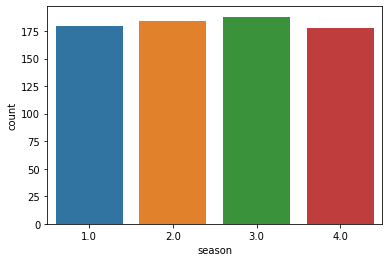

In [11]:
#countplot() method is used to show the counts of observations in each categorical bin using bars.
sns.countplot(df["season"])

<AxesSubplot:xlabel='season', ylabel='count'>

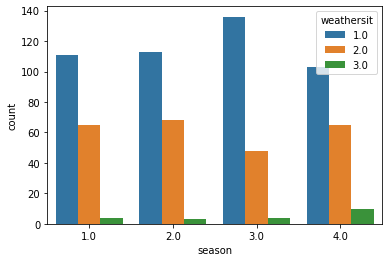

In [12]:
sns.countplot(x='season',hue = 'weathersit',data = df)

<AxesSubplot:xlabel='holiday', ylabel='count'>

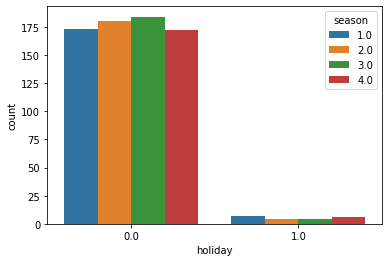

In [13]:
sns.countplot(x='holiday',hue = 'season',data = df)

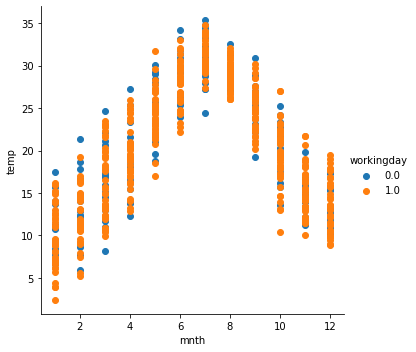

In [14]:
sns.FacetGrid(df,hue = "workingday",height = 5) \
.map(plt.scatter,"mnth","temp") \
.add_legend()
plt.show()

<AxesSubplot:xlabel='mnth', ylabel='hum'>

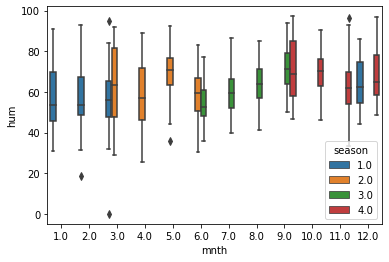

In [15]:
sns.boxplot(x = "mnth", y = "hum",hue = 'season',data = df)

[Text(0.5, 1.0, 'bikes count')]

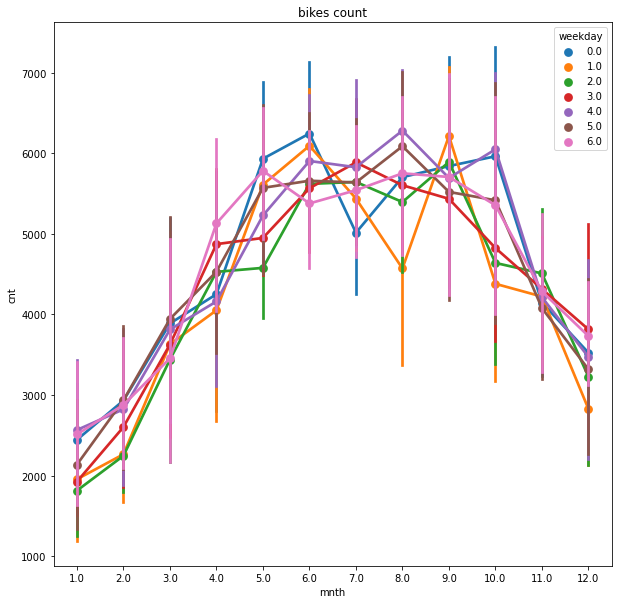

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
sns.pointplot(data=df,x="mnth",y = "cnt",hue="weekday",ax=ax)
ax.set(title="bikes count")

[Text(0.5, 1.0, ' registered users:- bikes count')]

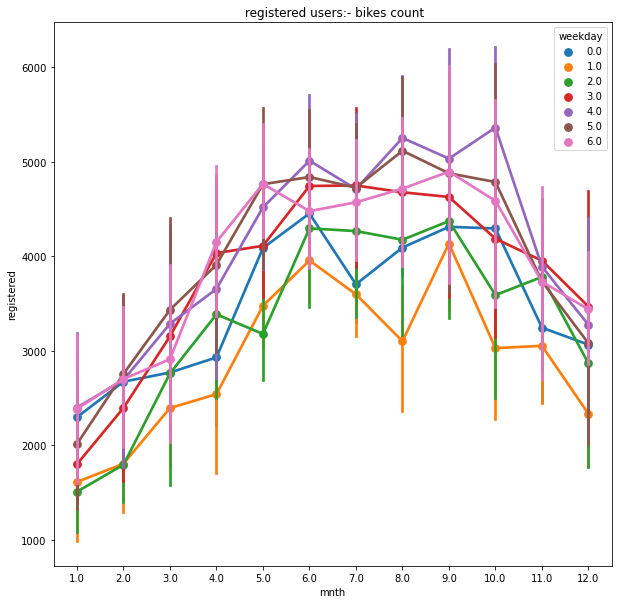

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
sns.pointplot(data=df,x="mnth",y = "registered",hue="weekday",ax=ax)
ax.set(title=" registered users:- bikes count")

[Text(0.5, 1.0, 'bikes count:- unregistered user')]

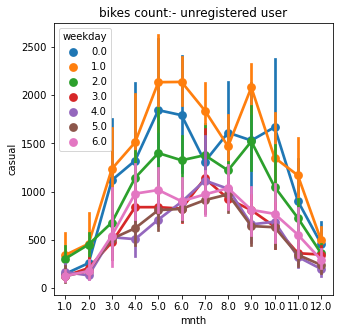

In [18]:
fig,ax = plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x="mnth",y = "casual",hue="weekday",ax=ax)
ax.set(title="bikes count:- unregistered user")

<AxesSubplot:>

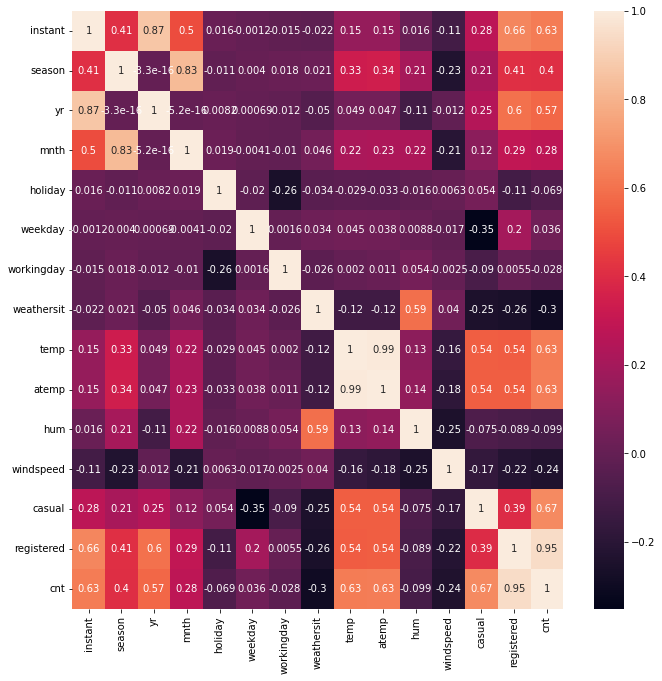

In [19]:
corr=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr,annot=True,annot_kws={"size":10})

In [20]:
# seperating the data and label
X = df.drop(columns=['dteday','instant','cnt'],axis = 1)
Y = df['cnt']

# SPLITTING THE DATASET

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(730, 13) (584, 13) (146, 13)


# Training the model

In [23]:
#support vector machine model
classifier = svm.SVC(kernel = 'linear')

In [24]:
# training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [25]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [26]:
print("Accuracy on training data = ",training_data_accuracy)

Accuracy on training data =  1.0


In [27]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [28]:
print("Accuracy on test data = ",test_data_accuracy)

Accuracy on test data =  0.0136986301369863


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X)

StandardScaler()

In [32]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-1.35081907 -1.         -1.60274527 ... -0.38783297 -0.75545499
  -1.92774539]
 [-1.35081907 -1.         -1.60274527 ...  0.74889891 -1.04699613
  -1.91748036]
 [-1.35081907 -1.         -1.60274527 ...  0.74593104 -1.06303089
  -1.55884588]
 ...
 [-1.35081907  1.          1.58764752 ... -0.85318166 -1.00618037
  -1.5889994 ]
 [-1.35081907  1.          1.58764752 ...  2.06785784 -0.7073507
  -1.42860831]
 [-1.35081907  1.          1.58764752 ... -0.46009409 -0.59802277
  -0.87814607]]


# LINEAR REGRESSION

In [33]:
from sklearn.linear_model  import LinearRegression
linreg = LinearRegression()
linreg.fit(X, Y)
ypred = linreg.predict(X)
print(ypred)

[ 985.  801. 1349. 1562. 1600. 1606. 1510.  959.  822. 1321. 1263. 1162.
 1406. 1421. 1248. 1204. 1000.  683. 1650. 1927. 1543.  981.  986. 1416.
 1985.  506.  431. 1167. 1098. 1096. 1501. 1360. 1526. 1550. 1708. 1005.
 1623. 1712. 1530. 1605. 1538. 1746. 1472. 1589. 1913. 1815. 2115. 2475.
 2927. 1635. 1812. 1107. 1450. 1917. 1807. 1461. 1969. 2402. 1446. 1851.
 2134. 1685. 1944. 2077.  605. 1872. 2133. 1891.  623. 1977. 2132. 2417.
 2046. 2056. 2192. 2744. 3239. 3117. 2471. 2077. 2703. 2121. 1865. 2210.
 2496. 1693. 2028. 2425. 1536. 1685. 2227. 2252. 3249. 3115. 1795. 2808.
 3141. 1471. 2455. 2895. 3348. 2034. 2162. 3267. 3126.  795. 3744. 3429.
 3204. 3944. 4189. 1683. 4036. 4191. 4073. 4400. 3872. 4058. 4595. 5312.
 3351. 4401. 4451. 2633. 4433. 4608. 4714. 4333. 4362. 4803. 4182. 4864.
 4105. 3409. 4553. 3958. 4123. 3855. 4575. 4917. 5805. 4660. 4274. 4492.
 4978. 4677. 4679. 4758. 4788. 4098. 3982. 3974. 4968. 5312. 5342. 4906.
 4548. 4833. 4401. 3915. 4586. 4966. 4460. 5020. 48

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f"MAE : {mean_absolute_error(Y, ypred)}")
print(f"MSE : {mean_squared_error(Y, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(Y, ypred))}")
print(f"Accuracy : {r2_score(Y, ypred)}")

MAE : 1.3236827159482644e-12
MSE : 2.5681218852647154e-24
RMSE : 1.6025360792396269e-12
Accuracy : 1.0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linreg=LinearRegression()



linreg.fit(Xtrain,Ytrain)

LinearRegression()

In [39]:
ypred= linreg.predict(Xtest)
print(ypred)
print(Ytest)

[2710. 3894. 3915. 7466. 6591. 5495. 6043. 4579. 5686. 4304. 3351. 1977.
  822. 4195. 8090. 4717. 5515. 6572. 7767. 6772. 1851. 6998. 2739. 6093.
 4966. 4118. 5170. 7765. 7216. 2475.  754. 7350. 1683. 4270. 6241. 3644.
 1416. 4630. 3292. 3389. 4553. 6784. 3523. 3322. 5202. 4763. 5191. 4639.
 2594. 4996. 2034. 3659. 3623. 1812. 2368. 2832. 1969. 7006. 2660. 1927.
 6457. 2134. 5084. 2121. 3005. 3053. 4592. 4150. 1685. 3204. 7261. 2843.
 6597. 1562. 7444. 7415. 7693. 4507. 1872. 5319. 5267. 3598. 7286. 2402.
  627. 6778. 3126. 4905. 6864. 2311. 1005. 5204. 5138. 5342. 4484. 1746.
 1000. 6891. 4665. 1341. 7282.  985. 4656. 5099. 2485. 2192. 4023. 6530.
 2133. 4866. 4058. 2913. 7538. 4758. 4788. 7109. 7458. 5538. 4066.  920.
 2496. 3310. 7509. 1693. 2429. 3372. 1421. 3333. 2114. 6917. 3249. 7534.
 6460. 2918. 2302. 5847. 7429. 3376. 4105. 6140. 3577. 7393. 6536. 5087.
 1538. 7421.]
248    2710.0
298    3894.0
159    3915.0
660    7466.0
511    6591.0
        ...  
634    7393.0
510    6536.

In [40]:
from sklearn.metrics import r2_score

print(r2_score(Ytest,ypred))

1.0


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(Ytest,ypred)
mse

3.666807379340642e-24

In [43]:
import math
rmse = math.sqrt(mse)
print(rmse)

1.9148909575588482e-12


In [44]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.25)

print(Xtrain.shape)
print(Ytrain.shape)

(547, 13)
(547,)


In [45]:
print(Xtest.shape)
print(Ytest.shape)

(183, 13)
(183,)


In [46]:
lreg = LinearRegression()
lreg.fit(Xtrain,Ytrain)

lregpred = lreg.predict(Xtest)

In [47]:
print(lregpred)

[4905. 6597. 1005. 4966. 5107. 6904.  605. 4098. 2294. 6460. 7436. 7424.
 5409. 5119. 6227. 6536. 5035. 4359. 1263. 4073. 2729. 4120. 6639. 2659.
 5267. 3598. 1891. 7393. 2594. 1749. 5342. 4035. 5115. 7499. 1951. 3959.
 6207. 3574. 6864. 4509. 7570. 4073. 5585. 3624. 1712. 1944. 7538. 5336.
 5084. 6778. 4458. 2913. 3387. 6093. 1530. 7442. 4128. 4459. 5255. 1807.
 5058. 1472. 7109. 6772. 3485. 5170. 6998. 3331. 4708. 8090. 6871. 2162.
 4672. 1746. 4906. 3523. 5445. 2376. 5319. 3926. 4294.  754. 6233. 5786.
 2298. 6891. 1796. 4839. 5130. 4150. 7384. 5740. 4205. 3663. 3267. 4795.
 5323. 6241. 3777. 5572. 6784. 5312. 2416. 5202. 4270. 1167. 4991. 1416.
 7907. 1550. 6691. 3520. 2485. 4844. 2689. 6852. 2425. 6530. 5557. 1317.
 5923. 8395. 4451. 3767. 3068. 6978. 4097. 3944. 1162.  506. 2302. 6685.
 4187. 5558. 3214. 4186. 5423. 2843. 7534. 1969. 7605. 2429. 2132.   22.
 1589. 5041. 3872. 4758. 7720. 2277. 5180. 1421. 4763. 4990. 2475. 2210.
 6591. 2914. 1450. 7641. 2808. 1650. 7498. 2895. 33

In [48]:
lreg.score(Xtrain,Ytrain)

1.0

In [49]:
lreg.score(Xtest,Ytest)

1.0

In [50]:
mean_squared_error = np.mean((lregpred-Ytest)**2)
print(mean_squared_error)

9.475683390630107e-25


In [51]:
lreg_coef = pd.DataFrame()
lreg_coef['Columns']=Xtrain.columns
lreg_coef["Coeficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_coef)

       Columns  Coeficient Estimate
0       season        -4.062036e-14
1           yr         7.644996e-13
2         mnth         2.984418e-14
3      holiday        -4.028398e-13
4      weekday         4.249923e-14
5   workingday         5.523768e-14
6   weathersit        -2.952711e-14
7         temp         5.888692e-14
8        atemp         1.737586e-14
9          hum        -3.833739e-15
10   windspeed         3.711441e-15
11      casual         1.000000e+00
12  registered         1.000000e+00


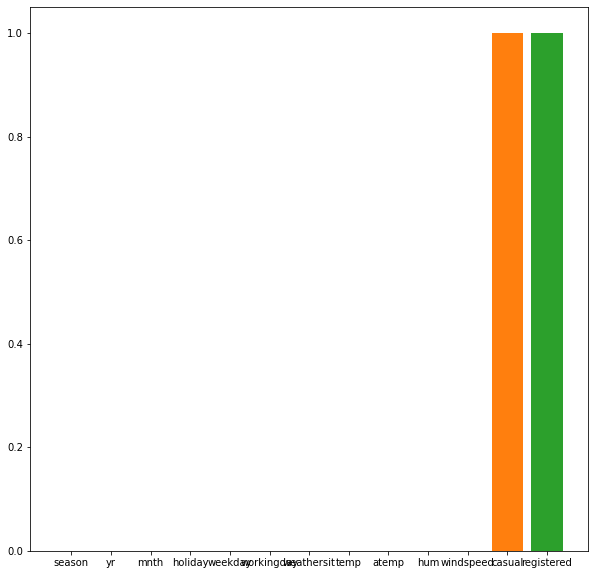

In [52]:
fig, ax = plt.subplots(figsize=(10,10))

color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive']
ax.bar(lreg_coef['Columns'],lreg_coef['Coeficient Estimate'],color = color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

# Regularization Model - Ridge

In [53]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 2)
ridgeR.fit(Xtrain,Ytrain)
ypred = ridgeR.predict(Xtest)

In [54]:
print(ridgeR.score(Xtrain,Ytrain))
print(ridgeR.score(Xtest,Ytest))

1.0
1.0


In [55]:
mse_ridge = np.mean((ypred-Ytest)**2)
print(mse_ridge)

8.848488020009615e-11


In [56]:
ridge_coef = pd.DataFrame()
ridge_coef["column"]=Xtrain.columns
ridge_coef['Coeficient Estimate']=pd.Series(ridgeR.coef_)
print(ridge_coef)

        column  Coeficient Estimate
0       season         4.032435e-06
1           yr         1.712725e-05
2         mnth        -4.343913e-07
3      holiday        -2.220271e-06
4      weekday        -1.120178e-06
5   workingday        -3.399685e-06
6   weathersit        -5.225359e-06
7         temp         5.990038e-07
8        atemp         6.711554e-07
9          hum        -9.327389e-08
10   windspeed        -3.241005e-07
11      casual         1.000000e+00
12  registered         1.000000e+00


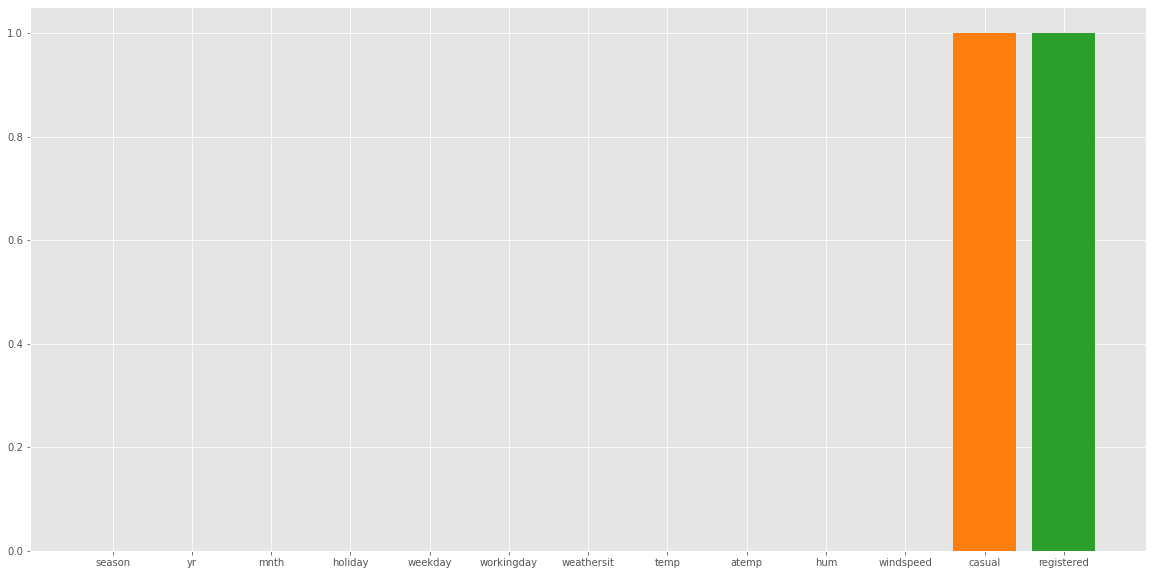

In [57]:
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive']
ax.bar(ridge_coef['column'],ridge_coef['Coeficient Estimate'],color = color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

# Regularization Model - Lasso

In [58]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2)
lasso.fit(Xtrain,Ytrain)
ypred1=lasso.predict(Xtest)

mse2=np.mean((ypred1-Ytest)**2)
print(mse2)

lasso_coef = pd.DataFrame()
lasso_coef["Columns"]=Xtrain.columns

0.00012250752857316004


In [59]:
print(lasso.score(Xtrain,Ytrain))
print(lasso.score(Xtest,Ytest))

0.9999999999668138
0.9999999999686214


In [60]:
lasso_coef['Coefficient Estimate']=pd.Series(lasso.coef_)
print(lasso_coef)

       Columns  Coefficient Estimate
0       season              0.000000
1           yr              0.000000
2         mnth             -0.000000
3      holiday              0.000000
4      weekday             -0.000000
5   workingday             -0.000000
6   weathersit             -0.000000
7         temp              0.000000
8        atemp              0.000000
9          hum             -0.000000
10   windspeed             -0.000000
11      casual              0.999983
12  registered              1.000002


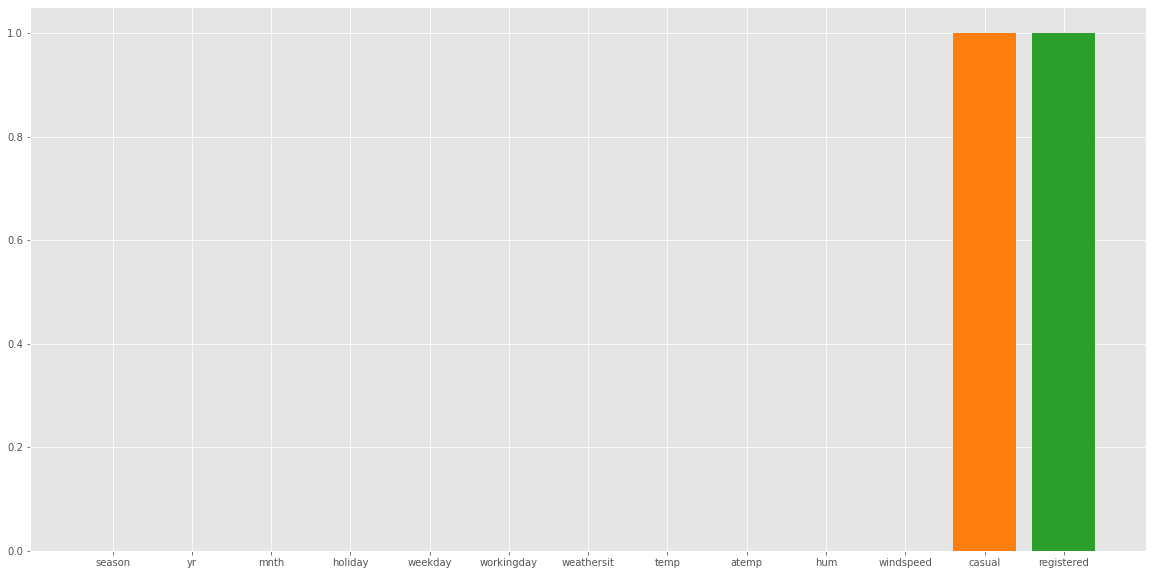

In [61]:
fig, ax = plt.subplots(figsize=(20,10))

color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive']
ax.bar(lasso_coef['Columns'],lasso_coef['Coefficient Estimate'],color = color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [62]:
input_data = (1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0)


# changing the input_data to numpy arrary
a= np.asarray(input_data)
                                    
# reshape the array as we are predicting for one instance    
input_data_reshaped = a.reshape(1,-1)

# standardize the input data


std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print("The cnt is 0")
else:
    print("The cnt is 1")

[[-1.35081907 -1.         -1.60274527 -0.17210224 -0.49820225  0.66963624
   1.11212654 -0.72206884 -0.74150727  0.48099557  0.74889891 -1.04699613
  -1.91748036]]
[22.]
The cnt is 1
